# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [47]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
from utils.plotter import *
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import graphviz

from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import linear_model

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [48]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
dataTrain = pd.read_csv(data_path, delimiter = ',') # Raw dataset with all indicator features
classColumns = dataTrain.columns[-19:] # Find all indicator features (last 19)
removeList = classColumns.tolist()
removeList.remove('is_person') 
imagesC_train = dataTrain.drop(removeList,axis=1) # Drop all indicator features apart from is_person
imagesC_train.drop(columns=['imgId'], axis = 1, inplace=True)

# Extract relevant validation dataset (image features + is_person)
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
dataVal = pd.read_csv(data_path, delimiter = ',')
classColumns = dataVal.columns[-19:] # Find all indicator features (last 19)
removeList = classColumns.tolist()
removeList.remove('is_person') 
imagesC_val = dataVal.drop(removeList,axis=1) # Drop all indicator features apart from is_person
imagesC_val.drop(columns=['imgId'], axis = 1, inplace=True)

# Extract testing features
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
imagesC_test = pd.read_csv(data_path, delimiter = ',')

In [49]:
print("Shape of Trining set: ", imagesC_train.shape, '\nDescribing the data:')
display(imagesC_train.describe())
print("Shape of Validation set: ", imagesC_val.shape, '\nDescribing the data:')
display(imagesC_val.describe())
print("Shape of Test set: ", imagesC_test.shape, '\nDescribing the data:')
display(imagesC_test.describe())


Shape of Trining set:  (2113, 501) 
Describing the data:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801,0.448178
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857,0.497425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076,1.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755,1.000000


Shape of Validation set:  (1113, 501) 
Describing the data:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


Shape of Test set:  (1114, 501) 
Describing the data:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,...,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.001754,0.000717,0.004379,0.001839,0.002207,0.002105,0.001058,0.002535,0.002053,0.002746,...,0.002033,0.000577,0.004880,0.001537,0.003591,0.002080,0.002897,0.002216,0.002438,0.003017
std,0.001226,0.001522,0.003648,0.001320,0.001539,0.001612,0.000863,0.002867,0.001990,0.002470,...,0.001597,0.001146,0.006427,0.001200,0.002626,0.001519,0.003240,0.001449,0.001897,0.002795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000977,0.000000,0.001488,0.000744,0.001019,0.001019,0.000340,0.000679,0.000744,0.001065,...,0.000791,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001065,0.001019,0.001019
50%,0.001590,0.000340,0.003397,0.001698,0.001860,0.001776,0.000822,0.001596,0.001667,0.002115,...,0.001698,0.000000,0.002717,0.001359,0.003057,0.001813,0.002038,0.002038,0.002038,0.002361
75%,0.002378,0.000781,0.006454,0.002717,0.003057,0.002717,0.001698,0.003397,0.002717,0.003720,...,0.002717,0.000679,0.006793,0.002232,0.004755,0.002734,0.003831,0.003057,0.003463,0.004076
max,0.009046,0.027699,0.021399,0.007473,0.009766,0.011889,0.004755,0.021399,0.021140,0.022500,...,0.015253,0.010691,0.062500,0.007576,0.026834,0.009851,0.029212,0.007812,0.012228,0.028193


In [50]:
# Function to compare two attributes

def compare(att1,att2,dataset):
    att1 = dataset[att1]
    att2 = dataset[att2]
    sns.scatterplot(att1,att2)
    


Looking for outliers by comparing the train set to validation set


<Figure size 432x288 with 0 Axes>

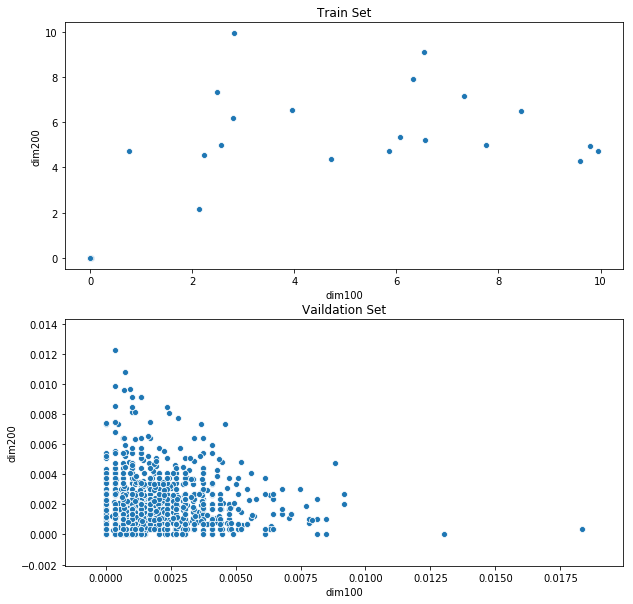

In [51]:
fig = plt.figure(1)
gridspec.GridSpec(2,2)
plt.figure(figsize=(10,10))
print("Looking for outliers by comparing the train set to validation set")
plt.subplot2grid((2,2), (0,0),colspan=2,rowspan=1)
compare('dim100','dim200',imagesC_train)
plt.title('Train Set')

plt.subplot2grid((2,2), (1,0),colspan=2,rowspan=1)
compare('dim100','dim200',imagesC_val)
_ = plt.title('Vaildation Set')

Looking for outliers by comparing the train set to validation set


<Figure size 432x288 with 0 Axes>

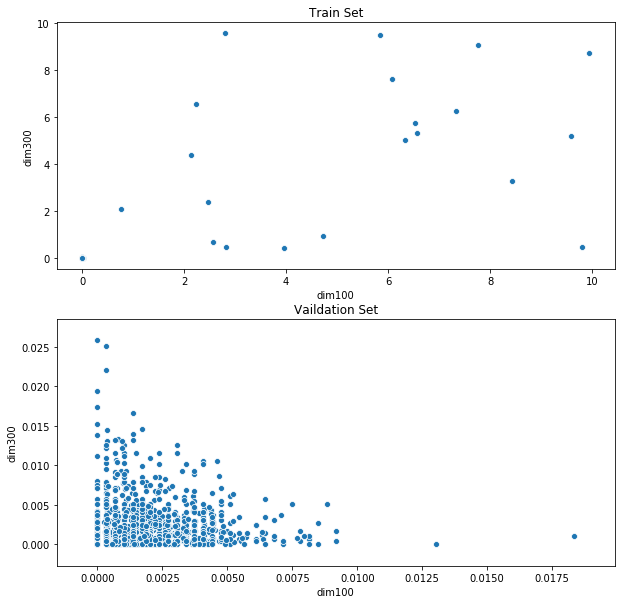

In [39]:
fig = plt.figure(1)
gridspec.GridSpec(2,2)
plt.figure(figsize=(10,10))
print("Looking for outliers by comparing the train set to validation set")
plt.subplot2grid((2,2), (0,0),colspan=2,rowspan=1)
compare('dim100','dim300',imagesC_train)
plt.title('Train Set')

plt.subplot2grid((2,2), (1,0),colspan=2,rowspan=1)
compare('dim100','dim300',imagesC_val)
_ = plt.title('Vaildation Set')

Looking for outliers by comparing the train set to validation set


<Figure size 432x288 with 0 Axes>

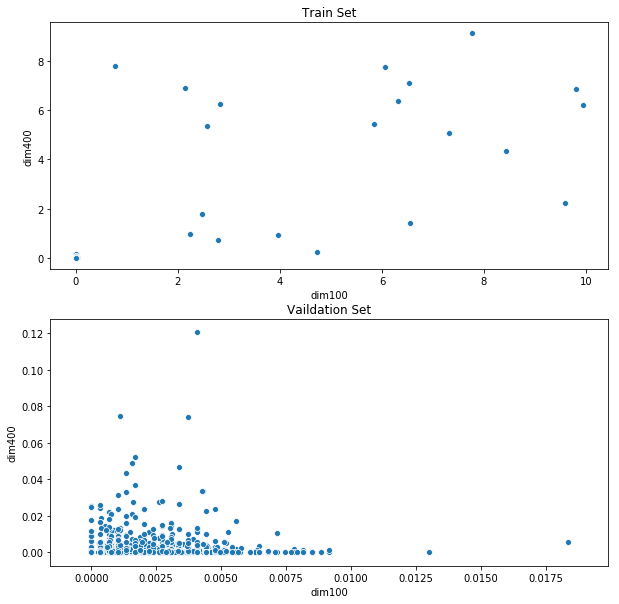

In [40]:
fig = plt.figure(1)
gridspec.GridSpec(2,2)
plt.figure(figsize=(10,10))
print("Looking for outliers by comparing the train set to validation set")
plt.subplot2grid((2,2), (0,0),colspan=2,rowspan=1)
compare('dim100','dim400',imagesC_train)
plt.title('Train Set')

plt.subplot2grid((2,2), (1,0),colspan=2,rowspan=1)
compare('dim100','dim400',imagesC_val)
_ = plt.title('Vaildation Set')

Looking for outliers by comparing the train set to validation set


<Figure size 432x288 with 0 Axes>

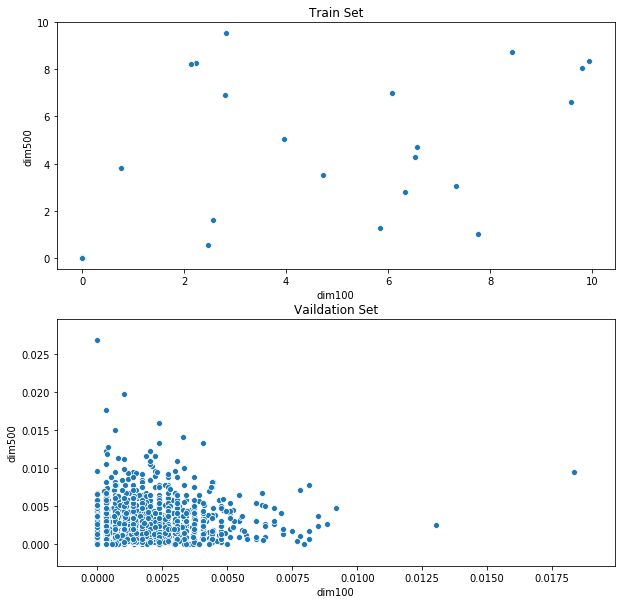

In [41]:
fig = plt.figure(1)
gridspec.GridSpec(2,2)
plt.figure(figsize=(10,10))
print("Looking for outliers by comparing the train set to validation set")
plt.subplot2grid((2,2), (0,0),colspan=2,rowspan=1)
compare('dim100','dim500',imagesC_train)
plt.title('Train Set')

plt.subplot2grid((2,2), (1,0),colspan=2,rowspan=1)
compare('dim100','dim500',imagesC_val)
_ = plt.title('Vaildation Set')

In [52]:
imagesC_train_clean = imagesC_train.copy(deep=True) # Keep original dataset
outliers = []
# Determine if there's an attribute value > 2, ignoring the image id attribute
for i in np.arange(1,imagesC_train_clean.shape[0]):
    for j in np.arange(1,imagesC_train_clean.shape[1]): 
        if (imagesC_train_clean.iloc[i,j] > 2):
            outliers.append(i)
            break
imagesC_train_clean.drop(imagesC_train_clean.index[outliers],inplace=True)
propOut = 100 * len(outliers) / imagesC_train.shape[0]
propOutRound = "%.3f" % propOut # Format to 2 decimal digits
print("Number of points in the cleaned dataset: " + str(imagesC_train_clean.shape[0]))
print("Number of points rejected as outliers: " + str(len(outliers)))
print("Proportion of outliers in the original dataset: " + propOutRound + "%")

Number of points in the cleaned dataset: 2093
Number of points rejected as outliers: 20
Proportion of outliers in the original dataset: 0.947%


In [53]:
print("Dimensionality of cleaned training set: " + str(imagesC_train_clean.shape))
imagesC_train_clean.describe()

Dimensionality of cleaned training set: (2093, 501)


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


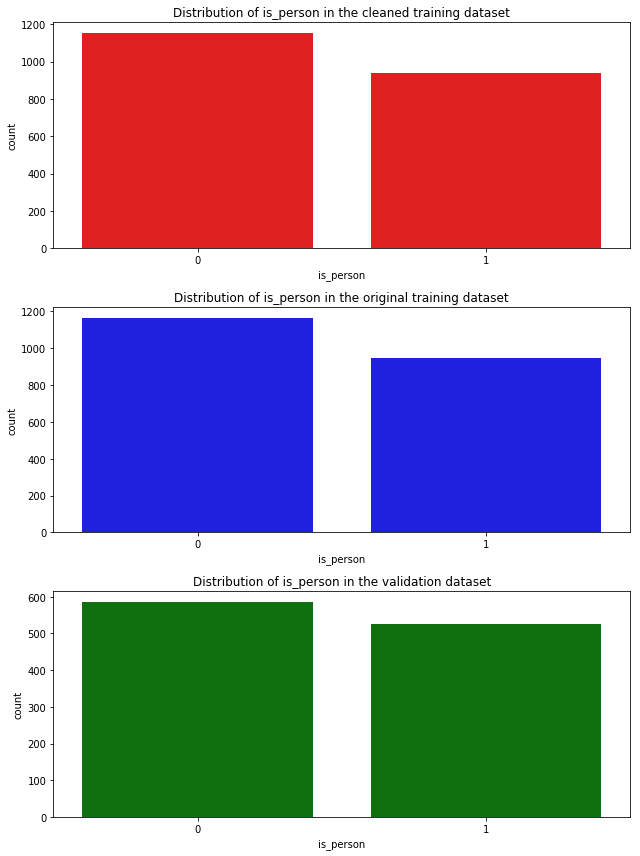

In [54]:
# Visualise is_person distribution in the training and validation datasets
plt.subplots(3, figsize=(9,12))
plt.subplot(3,1,1)
sns.countplot(x='is_person', data=imagesC_train_clean, color='Red') 
plt.title('Distribution of is_person in the cleaned training dataset')
plt.subplot(3,1,2)
sns.countplot(x='is_person', data=imagesC_train, color='Blue')
plt.title('Distribution of is_person in the original training dataset')
plt.subplot(3,1,3)
sns.countplot(x='is_person', data=imagesC_val, color='Green')
plt.title('Distribution of is_person in the validation dataset')
plt.tight_layout()
plt.show()

In [55]:
# Separate features and target labels in training (both original and cleaned) and validation datasets
X_train = imagesC_train.drop('is_person',axis=1)
X_train_clean = imagesC_train_clean.drop('is_person',axis=1)
X_val = imagesC_val.drop('is_person',axis=1)
y_train = imagesC_train['is_person']
y_train_clean = imagesC_train_clean['is_person']
y_val = imagesC_val['is_person']
# Sanity check
print('Training input feature shape: {}'.format(X_train.shape))
print('Cleaned training input feature shape: {}'.format(X_train_clean.shape))
print('Validation input feature shape: {}'.format(X_val.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Cleaned training labels shape: {}'.format(y_train_clean.shape))
print('Validation labels shape: {}'.format(y_val.shape))

Training input feature shape: (2113, 500)
Cleaned training input feature shape: (2093, 500)
Validation input feature shape: (1113, 500)
Training labels shape: (2113,)
Cleaned training labels shape: (2093,)
Validation labels shape: (1113,)


In [46]:
print('Accuracy of baseline classifier: {:.3f}'.format(1-(np.sum(y_val) / len(y_val))))
baseline_preds = np.repeat(0, X_val.shape[0])
print('Log loss of baseline classifier: {:.3f}'.format(log_loss(y_val,baseline_preds)))

Accuracy of baseline classifier: 0.527
Log loss of baseline classifier: 16.354


In [64]:
# Try default Logistic Classifier for both the original and cleaned datasets
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_clean, y_train_clean)
print('Classification accuracy of Logistic Regression model using cleaned training dataset: {:.3f}'.format(lr.score(X_val, y_val)))
y_preds = lr.predict_proba(X_val)

print('Log loss of Logistic Regression model using cleaned training dataset: {:.3f}'.format(log_loss(y_val,y_preds)))

# Visualise errors using a confusion matrix
# y_preds = lr.predict(X_val)
y_preds= lr.predict_proba(X_val)
# cm = confusion_matrix(y_val,y_preds)
# plt.figure()
# plot_confusion_matrix(cm, title = 'Confusin matrix using cleaned training dataset')

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Classification accuracy of Logistic Regression model using original training dataset: {:.3f}'.format(lr.score(X_val, y_val)))
y_preds = lr.predict_proba(X_val)
print('Log loss of Logistic Regression model using original training dataset: {:.3f}'.format(log_loss(y_val,y_preds)))

# Visualise errors using a confusion matrix
y_preds = lr.predict_proba(X_val)
# cm = confusion_matrix(y_val,y_preds)
# plt.figure()
# plot_confusion_matrix(cm,title = 'Confusion matrix using original training dataset')

Classification accuracy of Logistic Regression model using cleaned training dataset: 0.527
Log loss of Logistic Regression model using cleaned training dataset: 0.679
Classification accuracy of Logistic Regression model using original training dataset: 0.527
Log loss of Logistic Regression model using original training dataset: 0.680


In [24]:
# Standardisation - transform data to a standard Gaussian distribution
# First use the original dataset
std_scaler = preprocessing.StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_val_std = std_scaler.transform(X_val)

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [25]:
# KFold instance used many times later
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [65]:
Cs = np.logspace(-2,7,num=15) # Array holding values for C we consider
acMeans = [] 
acStds = [] 
logLosses = [] 
for C in Cs:
    lr = LogisticRegression(solver='lbfgs',C=C) # Train linear regression model with regularisation parameter
    scores = cross_val_score(estimator=lr,X=X_train_std,y=y_train,cv=kf) # Scores for each fold
    y_preds = cross_val_predict(method='predict_proba',estimator=lr,X=X_train_std,y=y_train,cv=kf) # Predictions when each instance in test fold
    acMeans.append(np.mean(scores))
    acStds.append(np.std(scores))
    logLosses.append(log_loss(y_train,y_preds))

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: Conver

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: Conver

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: Conver

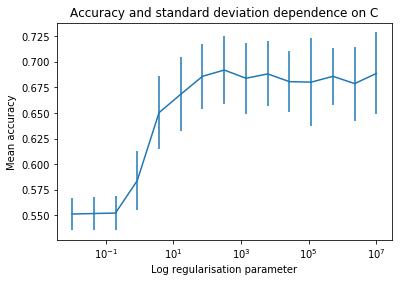

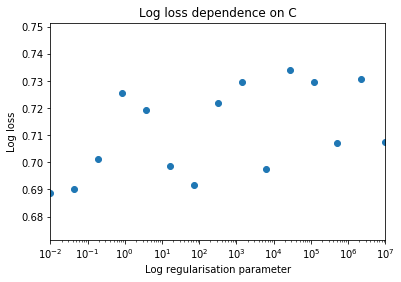

Best regularisation parameter was 316.228
Associated accuracy was 0.692
Associated log loss was 0.689


In [66]:
# Visualise mean and standard deviation dependence on the regularisation parameter
plt.figure()
plt.errorbar(x = Cs,y = acMeans, yerr = acStds)
plt.xscale('log')
plt.xlabel("Log regularisation parameter")
plt.ylabel("Mean accuracy")
plt.title("Accuracy and standard deviation dependence on C")

# Visualise log losses
plt.figure()
plt.scatter(x = Cs, y = logLosses)
plt.xlim((1e-2,1e7))
plt.xscale('log')
plt.xlabel("Log regularisation parameter")
plt.ylabel("Log loss")
plt.title("Log loss dependence on C")
plt.show()

# Report best regularisation parameter, its accuracy and log loss
bestAccuracy = np.max(acMeans)
bestLogLoss = np.min(logLosses)
print('Best regularisation parameter was {:.3f}'.format(Cs[acMeans.index(bestAccuracy)]))
print('Associated accuracy was {:.3f}'.format(acMeans[acMeans.index(bestAccuracy)]))
print('Associated log loss was {:.3f}'.format(logLosses[logLosses.index(bestLogLoss)]))

In [67]:
# Train Logistic regression model using best regularisation parameter found above
# Report classification accuracy and log loss on the validation set
lr_opt = LogisticRegression(solver='lbfgs', C = Cs[logLosses.index(bestLogLoss)])
lr_opt.fit(X_train_std, y_train)
y_preds = lr_opt.predict_proba(X_val_std)
print('Classification accuracy of optimised Logistic Regression classifer on validation set: {:.3f}'.format(lr_opt.score(X_val_std, y_val)))
print('Log loss of optimised Logistic Regression classifer on validation set: {:.3f}'.format(log_loss(y_val,y_preds)))

Classification accuracy of optimised Logistic Regression classifer on validation set: 0.633
Log loss of optimised Logistic Regression classifer on validation set: 0.638


In [68]:
# Preprocess the cleaned training dataset in the same way as before 
X_train_clean_std = std_scaler.fit_transform(X_train_clean)
X_val_std = std_scaler.transform(X_val)

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
# Optimise a Logistic Regression model for different regularisation parameters using cross validation
# Similar as before, but this time using the standardised cleaned training dataset 
Cs = np.logspace(-5,3,num=15)
acMeans = []
acStds = [] 
logLosses = []
for C in Cs:
    lr = LogisticRegression(solver='lbfgs',C=C) # Train linear regression model with regularisation parameter
    scores = cross_val_score(estimator=lr,X=X_train_clean_std,y=y_train_clean,cv=kf) # Scores for each fold
    y_preds = cross_val_predict(method='predict_proba',estimator=lr,X=X_train_clean_std,y=y_train_clean,cv=kf) # Predictions when each instance in test fold
    acMeans.append(np.mean(scores))
    acStds.append(np.std(scores))
    logLosses.append(log_loss(y_train_clean,y_preds))
    


/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: Conver

/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ishan/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: Conver

Best regularisation parameter was 0.002
Associated accuracy was 0.708
Associated log loss was 0.572


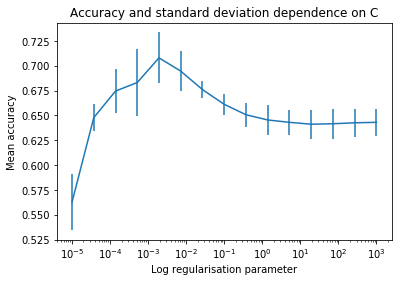

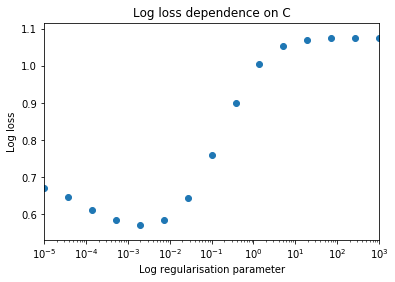

In [75]:
# Visualise mean and standard deviation dependence on the regularisation parameter
plt.figure()
plt.errorbar(x = Cs,y = acMeans, yerr = acStds)
plt.xscale('log')
plt.xlabel("Log regularisation parameter")
plt.ylabel("Mean accuracy")
plt.title("Accuracy and standard deviation dependence on C")

# Visualise log losses
plt.figure()
plt.scatter(x = Cs, y = logLosses)
plt.xlim((1e-5, 1e3)) 
plt.xscale('log')
plt.xlabel("Log regularisation parameter")
plt.ylabel("Log loss")
plt.title("Log loss dependence on C")

# Report best regularisation parameter, its accuracy and log loss
bestAccuracy = np.max(acMeans)
bestLogLoss = np.min(logLosses)
print('Best regularisation parameter was {:.3f}'.format(Cs[acMeans.index(bestAccuracy)]))
print('Associated accuracy was {:.3f}'.format(acMeans[acMeans.index(bestAccuracy)]))
print('Associated log loss was {:.3f}'.format(logLosses[logLosses.index(bestLogLoss)]))

In [77]:
# Train Logistic regression model using best regularisation parameter found above
# Report classification accuracy and log loss on the validation set
lr_opt_clean = LogisticRegression(solver='lbfgs', C = Cs[logLosses.index(bestLogLoss)])
lr_opt_clean.fit(X_train_clean_std, y_train_clean)
y_preds = lr_opt_clean.predict_proba(X_val_std)
print('Classification accuracy of optimised Logistic Regression classifer on validation set: {:.3f}'.format(lr_opt_clean.score(X_val_std, y_val)))
print('Log loss of optimised Logistic Regression classifer on validation set: {:.3f}'.format(log_loss(y_val,y_preds)))

# 
X_test = imagesC_test.drop('is_person',axis=1)
lr_opt_clean.predict_proba(X_test)
pred_probabilities = lr_opt_clean.predict_proba(X_test)

Classification accuracy of optimised Logistic Regression classifer on validation set: 0.702
Log loss of optimised Logistic Regression classifer on validation set: 0.579


#ANSWER_TEXT#

***Your answer goes here:***

In [78]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
# if pred_probabilities.shape != (1114, 2):
#     print('Array is of incorrect shape. Rectify this before submitting.')
# elif (pred_probabilities.sum(axis=1) != 1.0).all():
#     print('Submitted values are not correct probabilities. Rectify this before submitting.')
# else:
#     for _prob in pred_probabilities:
#         print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.56132461, 0.43867539
0.56158068, 0.43841932
0.56060142, 0.43939858
0.56057281, 0.43942719
0.56098174, 0.43901826
0.55995902, 0.44004098
0.56027073, 0.43972927
0.55996546, 0.44003454
0.56339884, 0.43660116
0.56105402, 0.43894598
0.56028768, 0.43971232
0.56121288, 0.43878712
0.56124429, 0.43875571
0.56098457, 0.43901543
0.55960020, 0.44039980
0.56051743, 0.43948257
0.55974804, 0.44025196
0.56096129, 0.43903871
0.56095960, 0.43904040
0.56069654, 0.43930346
0.56234366, 0.43765634
0.56081191, 0.43918809
0.56091582, 0.43908418
0.56054959, 0.43945041
0.56112298, 0.43887702
0.55986628, 0.44013372
0.56003084, 0.43996916
0.56140650, 0.43859350
0.56053393, 0.43946607
0.56037015, 0.43962985
0.56118858, 0.43881142
0.56046719, 0.43953281
0.56160288, 0.43839712
0.56065164, 0.43934836
0.56099567, 0.43900433
0.56060096, 0.43939904
0.56013503, 0.43986497
0.56120369, 0.43879631
0.56135151, 0.43864849
0.56083715, 0.43916285
0.56149816, 0.43850184
0.56055037, 0.43944963
0.56050848, 0.43949152
0.56150981,